# Modelo de Arvores de Decisões - CAPES

## Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

## Extrating

In [2]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/main/data/Grande%20Base.csv'
df_inicial = pd.read_csv(uri, encoding='latin-1')

## Tranforming

In [5]:
df = df_inicial.select_dtypes(exclude = 'object').drop(columns = ["NR_PAGINAS", "GUS_pag_por_aluno"])
df = df.dropna()

In [8]:
def cria_coluna_alvo(row):
    
    conceito = row['CONCEITO_PROGRAMA']
    
    if conceito >= 5:
        return 1
    else:
        return 0

In [9]:
df['BOM_CONCEITO'] = df.apply(cria_coluna_alvo, axis = 1)

In [11]:
df['BOM_CONCEITO'].value_counts()

0    13896
1     6353
Name: BOM_CONCEITO, dtype: int64

In [13]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES,BOM_CONCEITO
0,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,0.0,0,21,15,10,25,0,25,1967.560000,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,1981.000000,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3,0
1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,1.0,0,13,14,8,22,0,22,1966.954545,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,1983.275362,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3,0
2,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,0.0,0,20,14,8,22,0,22,1971.136364,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,1984.311111,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3,0
3,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,0.0,0,18,13,7,20,0,20,1972.200000,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,1986.493827,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4,0
4,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,1.0,0,21,14,8,22,0,22,1973.727273,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,1987.579439,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4,0


In [24]:
X = df.drop(columns = ['CONCEITO_PROGRAMA','CD_CONCEITO_PROGRAMA','BOM_CONCEITO','MEDIA_CONCEITO_CURSO'])

In [25]:
y = df['BOM_CONCEITO']

## Modeling

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Baseline

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)


modelo = DummyClassifier()
results = cross_validate(modelo, X , y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'A acurácia do dummy stratified, 10 = [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

A acurácia do dummy stratified, 10 = [68.58, 68.67]


### Decision Tree básico

In [28]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f"Accuracy médio: {media * 100}")
    print(f'Acurácia intervalo: [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

In [32]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier



cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 79.40154930952032
Acurácia intervalo: [73.32, 85.49]


In [35]:
from sklearn.model_selection import GroupKFold

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv = cv, groups = X.CD_AREA_AVALIACAO, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 79.19165367934184
Acurácia intervalo: [72.53, 85.86]


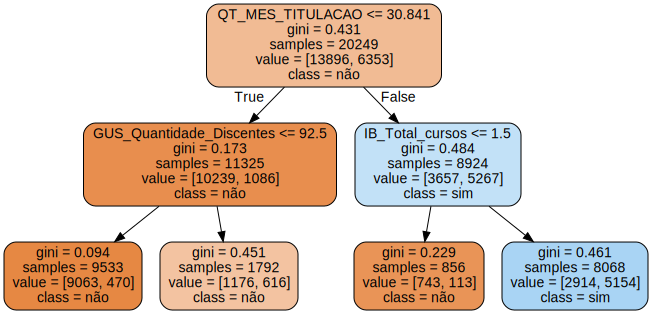

In [34]:
import graphviz
from sklearn.tree import export_graphviz


modelo.fit(X, y)
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ['não','sim'],
               feature_names=X.columns)

graph = graphviz.Source(dot_data)
graph

## Procurando a melhor árvore

In [39]:
def roda_arvore_de_decisao_com_treino(max_depth, printar = False):
    SEED = 301
    np.random.seed(SEED)

    cv = KFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X, y, cv = cv, return_train_score=True)
    media_teste = results['test_score'].mean() * 100
    media_treino = results['train_score'].mean() * 100
    if printar:
        print(f'Arvore max_depth: {max_depth}, media_teste: {media_teste}, media_treino: {media_treino}')
    tabela = [max_depth, media_treino, media_teste]
    return tabela

resultados = [roda_arvore_de_decisao_com_treino(max_depth=i, printar = True) for i in range(1,10)]

resultados = pd.DataFrame(resultados, columns = ["max_depth","train","test"])

Arvore max_depth: 1, media_teste: 76.38904016005466, media_treino: 76.50089765406808
Arvore max_depth: 2, media_teste: 79.40154930952032, media_treino: 79.70709229211
Arvore max_depth: 3, media_teste: 79.40154930952032, media_treino: 79.70709229211
Arvore max_depth: 4, media_teste: 80.02391304347827, media_treino: 81.49044441313163
Arvore max_depth: 5, media_teste: 80.26093788122773, media_treino: 82.42657036772081
Arvore max_depth: 6, media_teste: 80.56221392670668, media_treino: 83.49328851987943
Arvore max_depth: 7, media_teste: 80.5177450836871, media_treino: 84.84479559958619
Arvore max_depth: 8, media_teste: 80.09305616551993, media_treino: 86.23526298548411
Arvore max_depth: 9, media_teste: 79.3225516029864, media_treino: 87.74864508852494


Text(0.5, 1.0, 'Performance do Modelo')

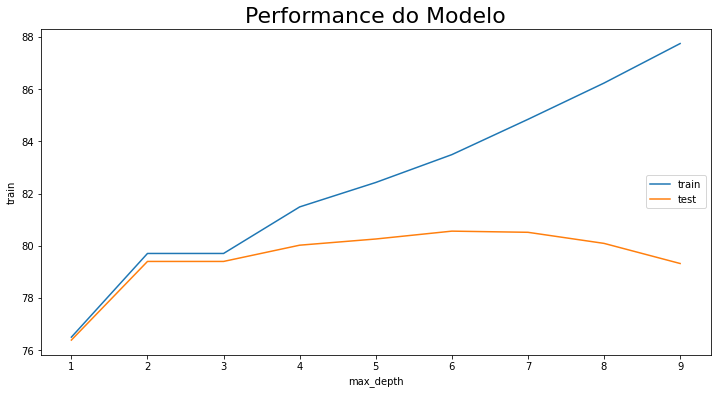

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(['train','test'], loc = 'center right')
plt.title('Performance do Modelo', fontsize = 22)

## Usando Randomized Search com Decision Tree

In [80]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.ensemble import RandomForestClassifier

In [81]:
espaco_de_parametros = {
    "max_depth" : randint(3,10),
    "min_samples_split" : randint(200,2000),
    "min_samples_leaf" : randint(200,2000),
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter=30,
                    cv = KFold(n_splits=5, shuffle=True))
busca.fit(X, y)
tac = time.time()

print(f'Tempo: {tac - tic}')
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 25.338024377822876


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160239,0.004793,0.004398,0.000799,gini,8,906,1406,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.807160,0.795802,0.802222,0.799012,0.817980,0.804435,0.007742,11
1,0.139852,0.001300,0.004001,0.000005,entropy,3,456,510,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.792346,0.786667,0.796296,0.789136,0.801679,0.793225,0.005318,29
2,0.199680,0.001776,0.004167,0.000423,entropy,5,573,1088,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.803210,0.808889,0.808642,0.801728,0.819462,0.808386,0.006231,8
3,0.157035,0.000893,0.004004,0.000004,gini,4,233,844,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.805679,0.798765,0.809877,0.804198,0.810571,0.805818,0.004276,9
4,0.141929,0.001341,0.004179,0.000418,gini,4,867,455,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.807160,0.795802,0.802222,0.799012,0.817980,0.804435,0.007742,11


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
def imprime_score(scores):
    media = scores.mean()
    desvio_padrao = scores.std()
    print(f"Accuracy médio: {media * 100}")
    print(f'Acurácia intervalo: [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

tic = time.time()

scores = cross_val_score(busca, X,y, cv = KFold(n_splits=5, shuffle=True))

tac = time.time()

print(f'Tempo: {tac - tic}')
imprime_score(scores)

Tempo: 89.02143740653992
Accuracy médio: 81.5102037082773
Acurácia intervalo: [80.49, 82.53]


In [84]:
busca.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=247, min_samples_split=622)

## Testando o modelo

In [99]:
modelo = DecisionTreeClassifier(max_depth=5, min_samples_leaf=247, min_samples_split=622)

In [100]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=247, min_samples_split=622)

In [101]:
y_pred = modelo.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test, y_pred)

0.8047736625514403

In [104]:
print(f"A precisão do modelo ficou em {round(accuracy_score(y_test, y_pred)*100, 2)}%")

A precisão do modelo ficou em 80.48%


## Visualizando

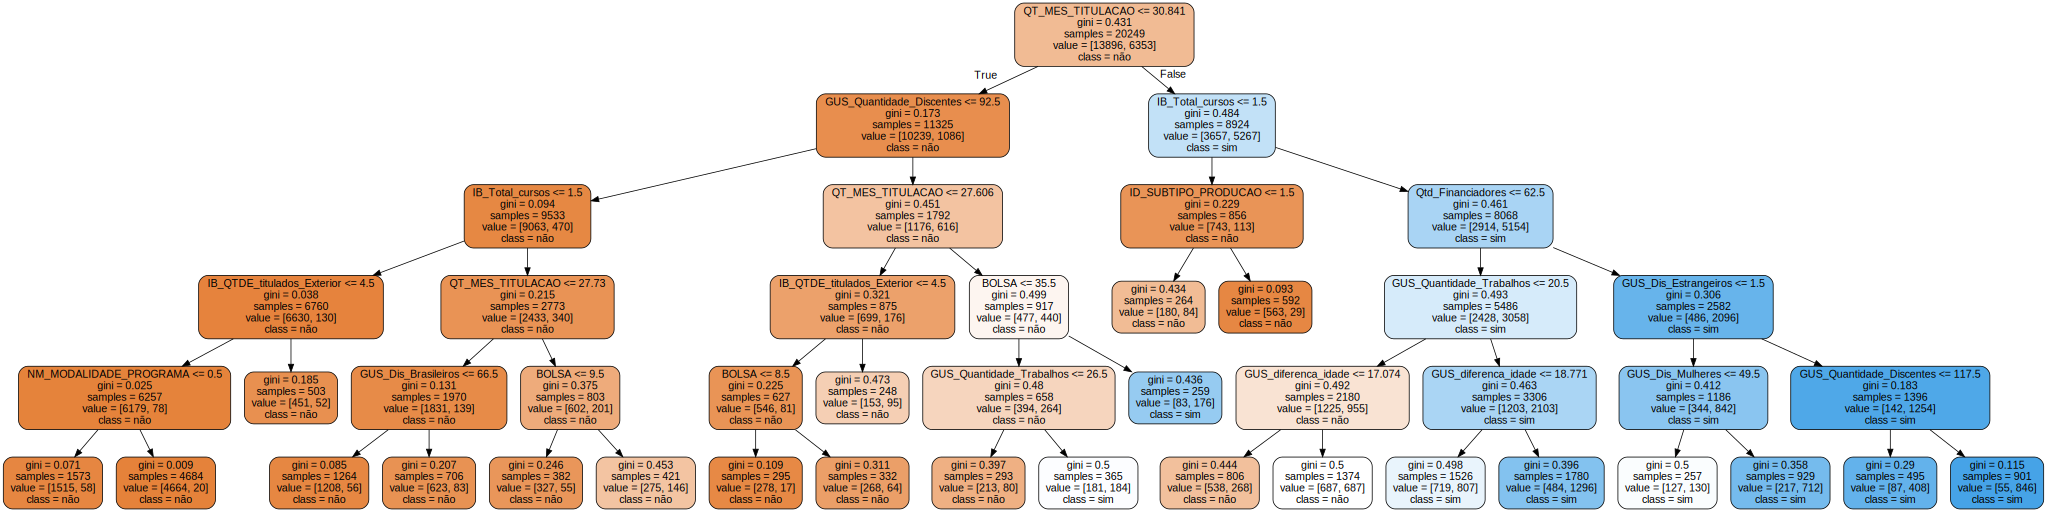

In [105]:
import graphviz
from sklearn.tree import export_graphviz


modelo.fit(X, y)
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ['não','sim'],
               feature_names=X.columns)

graph = graphviz.Source(dot_data)
graph

## Usando Randomized Search com Random Forest

In [60]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.ensemble import RandomForestClassifier

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": randint(10,101),
    "bootstrap": [True, False],
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32,129),
    "min_samples_leaf" : randint(32,129),
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=20,
                    cv = KFold(n_splits=5, shuffle=True))
busca.fit(X, y)
tac = time.time()

print(f'Tempo: {tac - tic}')
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 115.53950667381287


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.656627,0.041558,0.037400,0.004453,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.813827,0.811605,0.812840,0.818765,0.809583,0.813324,0.003068,20
1,1.087960,0.009802,0.031211,0.001476,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.813086,0.811852,0.820247,0.816049,0.817239,0.815695,0.002993,14
2,1.044865,0.015782,0.030506,0.001414,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.813827,0.810617,0.814568,0.818272,0.814769,0.814411,0.002441,17
3,0.687577,0.014493,0.021432,0.000823,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.810864,0.812840,0.811852,0.816296,0.815757,0.813522,0.002145,19
4,1.174474,0.015235,0.029800,0.000840,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.818272,0.819506,0.818025,0.822963,0.819462,0.819645,0.001765,9


In [62]:
modelo = busca.best_estimator_

In [63]:
from sklearn.model_selection import cross_val_score

tic = time.time()
scores = cross_val_score(modelo, X,y, cv = KFold(n_splits=5, shuffle=True))   #Muito tempo para executar
tac = time.time()

print(f'Tempo: {tac - tic}')
imprime_score(scores)

Tempo: 6.926324129104614
Accuracy médio: 82.50287313740019
Acurácia intervalo: [81.4, 83.61]


In [64]:
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(f"A precisão do modelo ficou em {round(accuracy_score(y_test, y_pred)*100, 2)}%")

A precisão do modelo ficou em 82.27%


In [68]:
df['Predicao'] = modelo.predict(X)

In [70]:
df['ERRO'] = abs(df['BOM_CONCEITO'] - df['Predicao'])

In [71]:
df['ERRO'].value_counts()

0    16832
1     3417
Name: ERRO, dtype: int64

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['BOM_CONCEITO'], df['Predicao'])

array([[12331,  1565],
       [ 1852,  4501]], dtype=int64)